In [1]:
import numpy as np
import tensorflow as tf

#import tensorflow.examples.tutorials.mnist.input_data as input_data
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'           , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


In [3]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
x = tf.placeholder("float", [None, 784])

In [5]:
h1 = layer(output_dim = 256, input_dim = 784, inputs = x, activation = tf.nn.relu)

In [6]:
y_predict = layer(output_dim = 10, input_dim = 256, inputs = h1, activation = None)

In [7]:
y_label = tf.placeholder("float", [None, 10])

In [8]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_predict, labels = y_label))

In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_function)

In [10]:
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))

In [11]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [12]:
trainEpochs = 15
batchSize =100
totalBatchs = int(mnist.train.num_examples / batchSize)

loss_list = []
epoch_list = []
accuracy_list = []

from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
    
    loss, acc = sess.run([loss_function, accuracy],
                          feed_dict = {x: mnist.validation.images,
                                       y_label: mnist.validation.labels})    
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss)," Accuracy=", acc)

duration = time() - startTime
print("Train Finished takes:", duration)

Train Epoch: 01 Loss= 6.856736660  Accuracy= 0.83
Train Epoch: 02 Loss= 4.251994610  Accuracy= 0.8842
Train Epoch: 03 Loss= 3.298591852  Accuracy= 0.9044
Train Epoch: 04 Loss= 2.663406610  Accuracy= 0.918
Train Epoch: 05 Loss= 2.332294464  Accuracy= 0.9234
Train Epoch: 06 Loss= 2.050018787  Accuracy= 0.931
Train Epoch: 07 Loss= 1.883876562  Accuracy= 0.9322
Train Epoch: 08 Loss= 1.821891785  Accuracy= 0.9328
Train Epoch: 09 Loss= 1.628813267  Accuracy= 0.9384
Train Epoch: 10 Loss= 1.478969216  Accuracy= 0.9408
Train Epoch: 11 Loss= 1.452196717  Accuracy= 0.9432
Train Epoch: 12 Loss= 1.394448400  Accuracy= 0.9422
Train Epoch: 13 Loss= 1.316482544  Accuracy= 0.9458
Train Epoch: 14 Loss= 1.340490580  Accuracy= 0.943
Train Epoch: 15 Loss= 1.330504060  Accuracy= 0.9438
Train Finished takes: 16.594000101089478


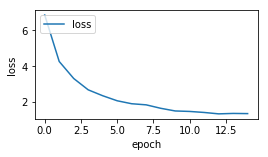

In [13]:
# plot loss 

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4, 2)  
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

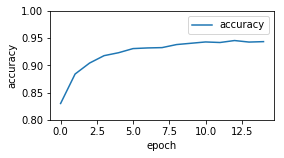

In [14]:
#plot accuracy

plt.plot(epoch_list, accuracy_list, label = "accuracy")
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.ylim(0.8, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [15]:
print("Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images,
                                                 y_label: mnist.test.labels}))

Accuracy: 0.9446


In [16]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict={x: mnist.test.images})

In [17]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [18]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28,28)), cmap='binary')
        title = "label=" + str(np.argmax(labels[idx]))
        
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

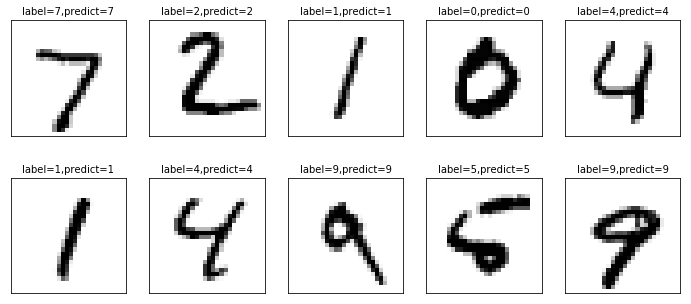

In [19]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, idx=0)